In [1]:
#Import relevant libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import sklearn as sk
import sklearn.model_selection as ms
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from django.core.wsgi import get_wsgi_application
from matplotlib import pyplot as plt
import sys
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/scripts/')
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/')
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/hedonic_model/ml/utils/')
import load_properties as lp
import load_soldproperties as lsp
lp.setup_environment()
%matplotlib inline
import mplleaflet
import ast
import data_utils
import data_utils as du
from scipy.stats import norm, skew 

import properties...


In [2]:
df = pd.read_csv('sold_homes_eppraisal.csv')

In [3]:
import pdvega

In [4]:
df.columns

Index(['listing_data_air_conditioning', 'listing_data_num_bedrooms',
       'address_lon', 'listing_data_lot_area_acres',
       'listing_data_garage_or_park_sqft', 'address_address_line1',
       'address_city', 'address_state', 'address_zipcode', 'last_sold_date',
       'sold_price_history', 'last_sold_price', 'listing_data_num_bathrooms',
       'address_lat', 'prop_taxes', 'listing_data_fireplace', 'year_built',
       'listing_data_roof_type', 'listing_data_building_area_sq_ft',
       'listing_data_heat_type', 'address_unit', 'listing_data_basement_area',
       'address_slug', 'listing_data_lot_area_sqft'],
      dtype='object')

In [5]:
df.last_sold_price.describe()

count    1.493700e+04
mean     2.926403e+05
std      5.284346e+05
min      1.200000e+03
25%      1.350000e+05
50%      1.980000e+05
75%      3.170000e+05
max      4.030000e+07
Name: last_sold_price, dtype: float64

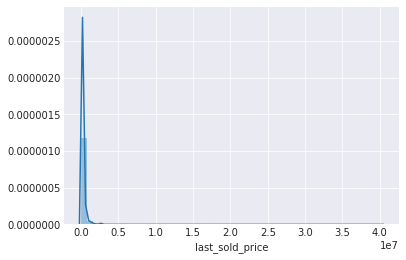

In [6]:
sns.distplot(df['last_sold_price'])

In [7]:
print("Skewness: %f" % df['last_sold_price'].skew())
print("Kurtosis: %f" % df['last_sold_price'].kurt())

Skewness: 36.886630
Kurtosis: 2405.485668


In [8]:
df['last_sold_price'].sort_values(ascending=False)

8505     40300000
13211    19000200
6562     17500000
4478     10705000
1011      8100000
838       7190000
7855      7000000
983       6200000
8531      6045000
3463      5990000
2328      5930000
1614      5480000
320       5293000
14584     5000000
5289      4981500
13797     4950000
4632      4850000
9191      4380000
7377      4225000
6662      4200000
4983      3900000
7876      3880000
690       3675000
13633     3560000
7957      3550000
7916      3400000
11487     3275000
8341      3250000
5092      3200000
662       3186000
           ...   
2082         4500
12816        4500
728          4195
11836        4000
4906         4000
5469         4000
13240        3950
9417         3525
561          3500
5332         3500
7123         3000
4777         3000
2822         3000
12234        3000
8156         2750
7012         2500
14277        2500
2128         2500
4993         2500
6513         2000
1138         2000
4708         2000
4332         2000
2525         1821
7362      

In [9]:
df['ppsq'] = df['last_sold_price']/df['listing_data_building_area_sq_ft']

In [10]:
df = df[df['ppsq']<1000]

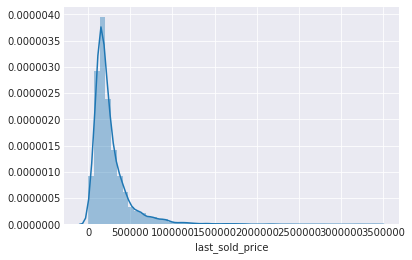

In [11]:
sns.distplot(df['last_sold_price'])

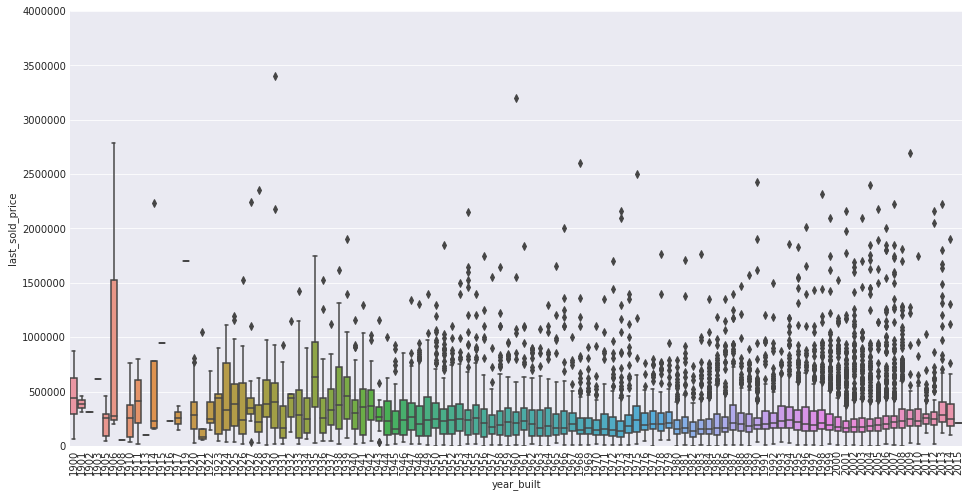

In [12]:
var = 'year_built'
data = pd.concat([df['last_sold_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="last_sold_price", data=data)
fig.axis(ymin=0, ymax=4000000);
plt.xticks(rotation=90);

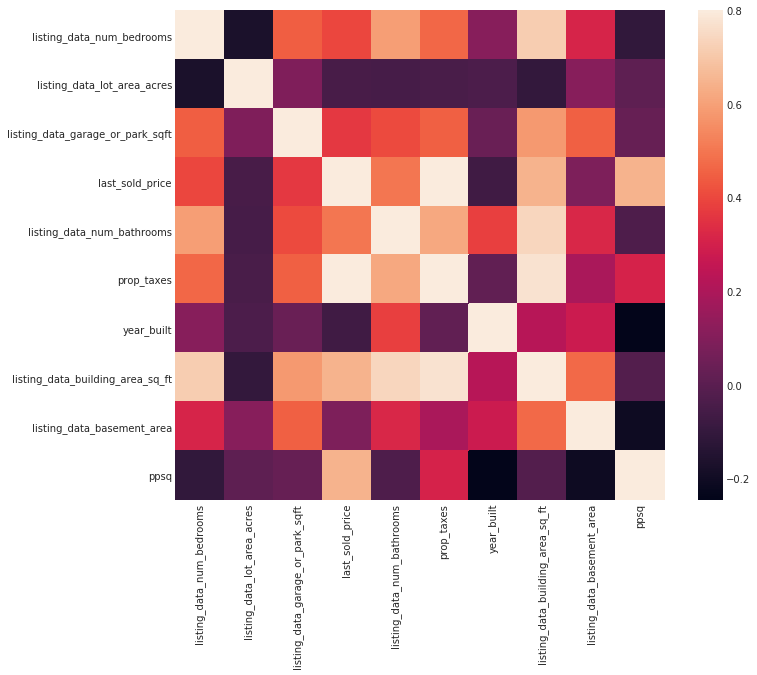

In [13]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

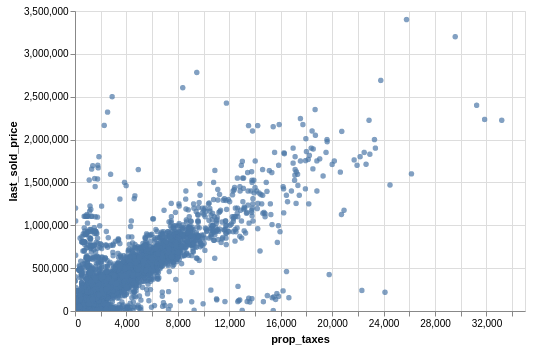

In [18]:
df.vgplot.scatter('prop_taxes','last_sold_price')

In [25]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
listing_data_basement_area,13886,0.940722
listing_data_garage_or_park_sqft,9940,0.673396
listing_data_roof_type,4763,0.322675
listing_data_fireplace,3740,0.253370
listing_data_heat_type,215,0.014565
ppsq,0,0.000000
last_sold_date,0,0.000000
listing_data_num_bedrooms,0,0.000000
address_lon,0,0.000000
listing_data_lot_area_acres,0,0.000000


In [16]:
df[['listing_data_roof_type','ppsq']].groupby('listing_data_roof_type').mean()

,ppsq
listing_data_roof_type,
F00,172.482571
G00,140.191759
I00,161.899558
O00,131.830736
T00,117.530336
W00,72.629969
Z00,150.831131


In [19]:
df[['listing_data_air_conditioning','ppsq']].groupby('listing_data_air_conditioning').mean()

,ppsq
listing_data_air_conditioning,
ACE,189.524725
Central,137.692179
None,161.849552
Other,18.876829
Wall,253.197062
Yes,169.538970


In [20]:
df[['listing_data_air_conditioning','ppsq']].groupby('listing_data_air_conditioning').size()

listing_data_air_conditioning
ACE            4
Central    13403
None        1164
Other          1
Wall           7
Yes           13
dtype: int64

In [22]:
df['listing_data_air_conditioning'] = df['listing_data_air_conditioning'].fillna(value='Central')

In [24]:
df[['listing_data_air_conditioning','ppsq']].groupby('listing_data_air_conditioning').size()

listing_data_air_conditioning
ACE            4
Central    13572
None        1164
Other          1
Wall           7
Yes           13
dtype: int64

In [26]:
df[['listing_data_heat_type','ppsq']].groupby('listing_data_heat_type').size()

listing_data_heat_type
Baseboard            140
Central                5
Forced Air Unit       99
Heat Pump            837
Hot Water             21
None                  69
Steam                  1
Yes                13374
dtype: int64

In [27]:
df['listing_data_heat_type'] = df['listing_data_heat_type'].fillna(value='Yes')

In [28]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
listing_data_basement_area,13886,0.940722
listing_data_garage_or_park_sqft,9940,0.673396
listing_data_roof_type,4763,0.322675
listing_data_fireplace,3740,0.253370
ppsq,0,0.000000
sold_price_history,0,0.000000
listing_data_num_bedrooms,0,0.000000
address_lon,0,0.000000
listing_data_lot_area_acres,0,0.000000
address_address_line1,0,0.000000


In [29]:
df[['listing_data_fireplace','ppsq']].groupby('listing_data_fireplace').size()

listing_data_fireplace
1    10844
2        3
4        1
Y      173
dtype: int64